In [1]:
from utils.download_kaggle_dataset import download_kaggle_competition
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.decomposition import PCA

In [2]:

DATA_DIR = 'datasets/drw-crypto-market-prediction'

df_train = pd.read_parquet(f"{DATA_DIR}/train.parquet")
df_test = pd.read_parquet(f"{DATA_DIR}/test.parquet")


print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Columns in train:", df_train.columns.tolist())

Train shape: (525887, 896)
Test shape: (538150, 896)
Columns in train: ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123

In [3]:
print("\n--- Training Data Head ---")
print(df_train.head())


--- Training Data Head ---
                     bid_qty  ask_qty  buy_qty  sell_qty   volume        X1  \
timestamp                                                                     
2023-03-01 00:00:00   15.283    8.425  176.405    44.984  221.389  0.121263   
2023-03-01 00:01:00   38.590    2.336  525.846   321.950  847.796  0.302841   
2023-03-01 00:02:00    0.442   60.250  159.227   136.369  295.596  0.167462   
2023-03-01 00:03:00    4.865   21.016  335.742   124.963  460.705  0.072944   
2023-03-01 00:04:00   27.158    3.451   98.411    44.407  142.818  0.173820   

                           X2        X3        X4        X5  ...      X882  \
timestamp                                                    ...             
2023-03-01 00:00:00 -0.417690  0.005399  0.125948  0.058359  ...  1.925423   
2023-03-01 00:01:00 -0.049576  0.356667  0.481087  0.237954  ...  1.928569   
2023-03-01 00:02:00 -0.291212  0.083138  0.206881  0.101727  ...  1.928047   
2023-03-01 00:03:00 -0.43659

In [4]:
print("\n--- Training Data Info ---")
print(df_train.info())

print("\n--- Missing Values in Training Set ---")
print(df_train.isnull().sum())
print("Columns in training data:")
print(df_train.columns.tolist())



--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 525887 entries, 2023-03-01 00:00:00 to 2024-02-29 23:59:00
Columns: 896 entries, bid_qty to label
dtypes: float64(896)
memory usage: 3.5 GB
None

--- Missing Values in Training Set ---
bid_qty     0
ask_qty     0
buy_qty     0
sell_qty    0
volume      0
           ..
X887        0
X888        0
X889        0
X890        0
label       0
Length: 896, dtype: int64
Columns in training data:
['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69'

In [5]:
print("\n--- Timestamp Range in Training Set ---")
print(f"Start: {df_train.index.min()}, End: {df_train.index.max()}")
print(f"Duration: {df_train.index.max() - df_train.index.min()}")

print("\n--- Timestamp Frequency ---")
print(df_train.index.to_series().diff().value_counts().head())


--- Timestamp Range in Training Set ---
Start: 2023-03-01 00:00:00, End: 2024-02-29 23:59:00
Duration: 365 days 23:59:00

--- Timestamp Frequency ---
timestamp
0 days 00:01:00    525613
0 days 00:02:00       117
0 days 00:03:00        56
0 days 00:04:00        18
0 days 00:08:00        14
Name: count, dtype: int64


In [6]:
print("\n--- Missing Values in Training Data ---")
missing = df_train.isnull().sum()
print(missing[missing > 0].sort_values(ascending=False))


--- Missing Values in Training Data ---
Series([], dtype: int64)


In [7]:
core_cols = ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'label']
print("\n--- Descriptive Statistics for Core Columns ---")
print(df_train[core_cols].describe().T)


--- Descriptive Statistics for Core Columns ---
             count        mean         std        min        25%         50%  \
bid_qty   525887.0    9.968003   15.645741   0.001000   2.634000    6.415000   
ask_qty   525887.0   10.174169   15.889582   0.001000   2.678000    6.538000   
buy_qty   525887.0  131.726678  307.267251   0.000000  26.407000   57.015000   
sell_qty  525887.0  132.673944  309.803040   0.000000  27.021000   58.047000   
volume    525887.0  264.400622  588.618746   0.000000  60.688500  120.799000   
label     525887.0    0.036126    1.009914 -24.416615  -0.381585    0.016262   

                 75%          max  
bid_qty    13.085000   1114.93200  
ask_qty    13.330000   1352.96500  
buy_qty   127.639000  17614.40000  
sell_qty  129.110000  17686.23400  
volume    256.733500  28701.41900  
label       0.434135     20.74027  



--- Label Distribution ---
count    525887.000000
mean          0.036126
std           1.009914
min         -24.416615
25%          -0.381585
50%           0.016262
75%           0.434135
max          20.740270
Name: label, dtype: float64
Skewness: -0.113
Kurtosis: 15.992


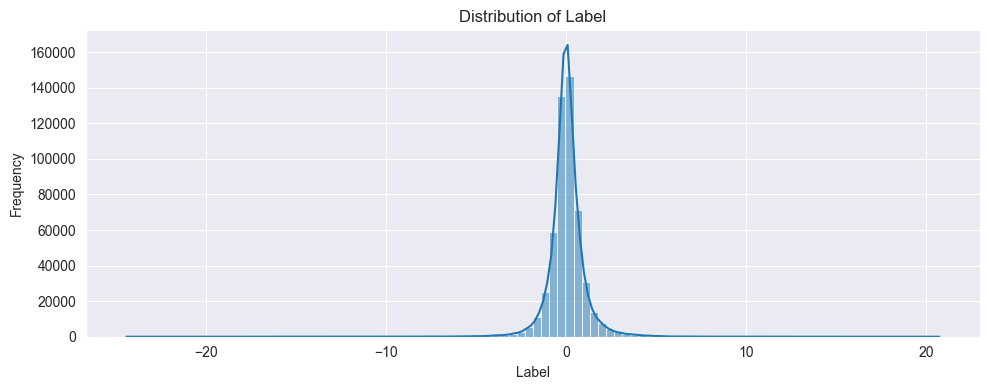

In [8]:
print("\n--- Label Distribution ---")
print(df_train['label'].describe())
print(f"Skewness: {df_train['label'].skew():.3f}")
print(f"Kurtosis: {df_train['label'].kurt():.3f}")
plt.figure(figsize=(10, 4))
sns.histplot(df_train['label'], bins=100, kde=True)
plt.title("Distribution of Label")
plt.xlabel("Label")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

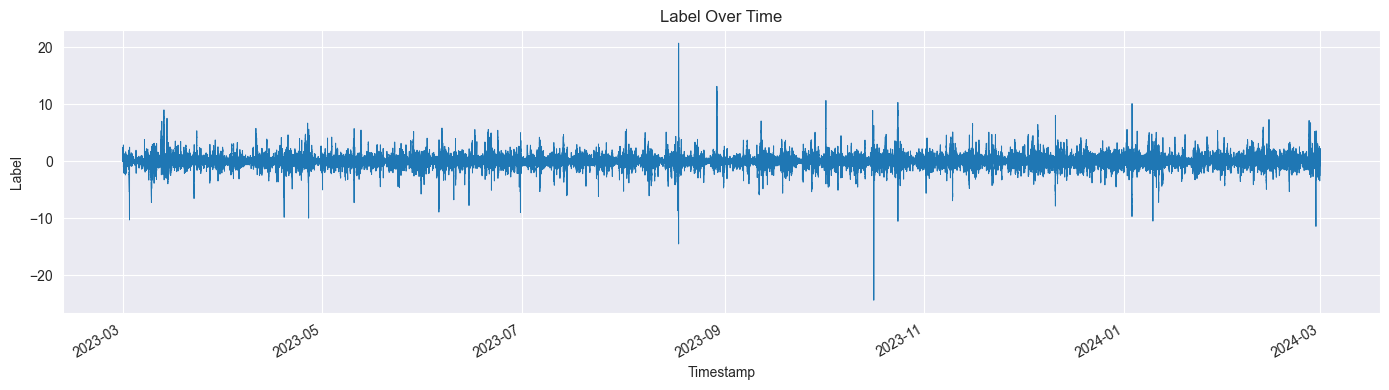

In [9]:
plt.figure(figsize=(14, 4))
df_train['label'].plot(title='Label Over Time', linewidth=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Label")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
anonym_cols = [col for col in df_train.columns if col.startswith('X')]
print(f"\n--- Total Anonymized Features: {len(anonym_cols)} ---")


--- Total Anonymized Features: 890 ---


In [11]:
print("\nSample stats for anonymized features:")
print(df_train[anonym_cols].iloc[:, :5].describe().T)


Sample stats for anonymized features:
       count      mean       std       min       25%       50%       75%  \
X1  525887.0 -0.006026  0.538340 -2.787539 -0.370635 -0.015991  0.349104   
X2  525887.0 -0.000243  0.613746 -5.861926 -0.314135 -0.001713  0.310181   
X3  525887.0 -0.000353  0.771744 -6.125439 -0.441536 -0.003010  0.431960   
X4  525887.0 -0.000425  0.857115 -6.093792 -0.521693 -0.003948  0.507830   
X5  525887.0 -0.000263  0.464695 -2.855040 -0.295502 -0.002545  0.287728   

         max  
X1  2.972741  
X2  6.151366  
X3  6.488532  
X4  6.394355  
X5  3.184776  


In [12]:
print("\n--- Comparing Train & Test Feature Columns ---")
train_cols = set(df_train.columns)
test_cols = set(df_test.columns)
diff = train_cols.symmetric_difference(test_cols)
print("Columns different between train and test:", diff)


--- Comparing Train & Test Feature Columns ---
Columns different between train and test: set()


In [13]:
print("\n--- Timestamp Range in Test Set ---")
print(f"Start: {df_test.index.min()}, End: {df_test.index.max()}")
print(f"Duration: {df_test.index.max() - df_test.index.min()}")


--- Timestamp Range in Test Set ---
Start: 1, End: 538150
Duration: 538149



--- Sample Rows from Test Set ---
    bid_qty  ask_qty  buy_qty  sell_qty   volume        X1        X2  \
ID                                                                     
1     0.114   12.121   10.587    10.971   21.558 -0.732818  0.512331   
2     2.426    2.962  136.241    12.304  148.545 -0.337995 -0.412176   
3     1.085    2.343   23.390    57.171   80.561  0.111249  0.458221   
4    14.793    1.117  116.518    13.082  129.600 -0.149399 -0.640638   
5     0.033   14.178   43.800    49.836   93.636 -0.694662  0.611254   

          X3        X4        X5  ...      X882      X883      X884      X885  \
ID                                ...                                           
1  -0.041982 -0.598260 -0.517646  ...  1.014336  1.367567  1.584126  1.584126   
2  -0.259468 -0.334809 -0.247443  ...  1.748939  1.848177  0.000131  0.000323   
3   0.466916  0.574081  0.324722  ...  1.704680  1.772028  0.000550  0.003597   
4  -0.873778 -1.026144 -0.508816  ...  0.930946  1.0378

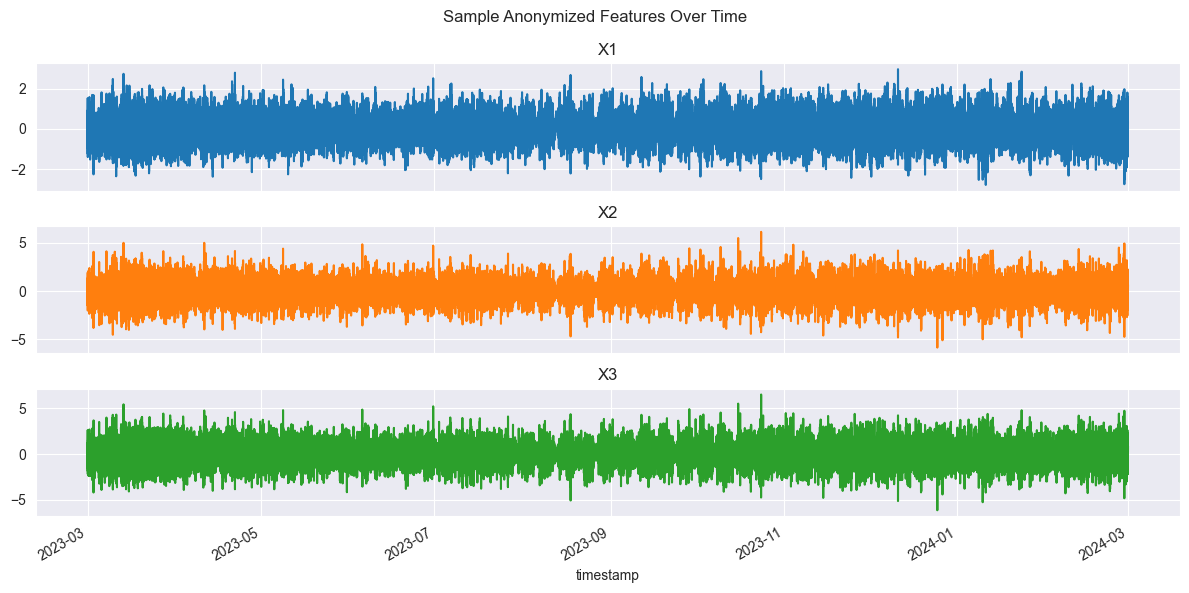

In [14]:
print("\n--- Sample Rows from Test Set ---")
print(df_test.head())

sample_feats = anonym_cols[:3]
df_train[sample_feats].plot(subplots=True, figsize=(12, 6), title=["X1", "X2", "X3"], legend=False)
plt.suptitle("Sample Anonymized Features Over Time")
plt.tight_layout()
plt.show()